 IMPORTANT FILES - TEST_EN_REORDERD(2) test_results_merged_dict
 Questions_final_sorted_no_fallback_dupes.json test_results_results2.json
 test_answers_en.json

PART A — Original dataset answers

CELL 1 — Load file

In [42]:
import json

ORIG_FILE = "test_results_merged_dict.json"
ORIG_MINUS1_FILE = "orig_minus1_ids.json"
ORIG_CLEAN_FILE = "test_results_merged_dict_clean.json"

with open(ORIG_FILE, "r", encoding="utf-8") as f:
    orig = json.load(f)


In [43]:
orig_minus1_ids = [
    qid for qid, item in orig.items()
    if item["answer"] == -1
]

print("Original results:")
print("Total entries:", len(orig))
print("Number of -1 answers:", len(orig_minus1_ids))
print("Sample -1 IDs:", orig_minus1_ids[:10])


Original results:
Total entries: 11435
Number of -1 answers: 2100
Sample -1 IDs: ['562', '563', '565', '566', '567', '568', '569', '571', '572', '573']


 CELL 3 — Dump -1 IDs to new file

In [44]:
with open(ORIG_MINUS1_FILE, "w", encoding="utf-8") as f:
    json.dump(orig_minus1_ids, f, indent=2)

print(f"✅ Dumped original -1 IDs to {ORIG_MINUS1_FILE}")


✅ Dumped original -1 IDs to orig_minus1_ids.json


CELL 4 — Remove -1s and save cleaned file

In [45]:
orig_clean = {
    qid: item
    for qid, item in orig.items()
    if item["answer"] != -1
}

with open(ORIG_CLEAN_FILE, "w", encoding="utf-8") as f:
    json.dump(orig_clean, f, indent=2, ensure_ascii=False)

print(f"✅ Cleaned original answers saved to {ORIG_CLEAN_FILE}")
print("Remaining entries:", len(orig_clean))


✅ Cleaned original answers saved to test_results_merged_dict_clean.json
Remaining entries: 9335


PART B — Answers with ONE OPTION ADDED

In [46]:
WITH_OPT_FILE = "test_results_results2.json"
WITH_OPT_MINUS1_FILE = "with_option_minus1_ids.json"
WITH_OPT_CLEAN_FILE = "test_results_results2_clean.json"

with open(WITH_OPT_FILE, "r", encoding="utf-8") as f:
    with_opt = json.load(f)


In [47]:
with_opt_minus1_ids = [
    qid for qid, item in with_opt.items()
    if item["answer"] == -1
]

print("\nWith-option results:")
print("Total entries:", len(with_opt))
print("Number of -1 answers:", len(with_opt_minus1_ids))
print("Sample -1 IDs:", with_opt_minus1_ids[:10])



With-option results:
Total entries: 11435
Number of -1 answers: 2220
Sample -1 IDs: ['562', '563', '565', '566', '567', '568', '569', '571', '572', '574']


CELL 7 — Dump -1 IDs to new file

In [48]:
with open(WITH_OPT_MINUS1_FILE, "w", encoding="utf-8") as f:
    json.dump(with_opt_minus1_ids, f, indent=2)

print(f"✅ Dumped with-option -1 IDs to {WITH_OPT_MINUS1_FILE}")


✅ Dumped with-option -1 IDs to with_option_minus1_ids.json


Remove -1s and save cleaned file

In [49]:
with_opt_clean = {
    qid: item
    for qid, item in with_opt.items()
    if item["answer"] != -1
}

with open(WITH_OPT_CLEAN_FILE, "w", encoding="utf-8") as f:
    json.dump(with_opt_clean, f, indent=2, ensure_ascii=False)

print(f"✅ Cleaned with-option answers saved to {WITH_OPT_CLEAN_FILE}")
print("Remaining entries:", len(with_opt_clean))



✅ Cleaned with-option answers saved to test_results_results2_clean.json
Remaining entries: 9215


File	Purpose
orig_minus1_ids.json	IDs to exclude / analyze (original)
with_option_minus1_ids.json	IDs to exclude / analyze (with option)
test_results_merged_dict_clean.json	Original answers, no -1s
test_results_results2_clean.json	With-option answers, no -1s

## ACCURACY

In [50]:
import json

GT_FILE = "test_answers_en.json"
ORIG_FILE = "test_results_merged_dict_clean.json"
OPT_FILE = "test_results_results2_clean.json"

with open(GT_FILE, "r", encoding="utf-8") as f:
    gt = json.load(f)

with open(ORIG_FILE, "r", encoding="utf-8") as f:
    orig = json.load(f)

with open(OPT_FILE, "r", encoding="utf-8") as f:
    opt = json.load(f)


In [51]:
ids_gt = set(gt.keys())
ids_orig = set(orig.keys())
ids_opt = set(opt.keys())

common_ids = ids_gt & ids_orig & ids_opt

print("Ground truth IDs:", len(ids_gt))
print("Original clean IDs:", len(ids_orig))
print("With-option clean IDs:", len(ids_opt))
print("Common IDs for evaluation:", len(common_ids))


Ground truth IDs: 11435
Original clean IDs: 9335
With-option clean IDs: 9215
Common IDs for evaluation: 8805


In [52]:
orig_aligned = {
    qid: orig[qid]
    for qid in common_ids
}


In [53]:
opt_aligned = {
    qid: opt[qid]
    for qid in common_ids
}


In [54]:
with open("orig_aligned.json", "w", encoding="utf-8") as f:
    json.dump(orig_aligned, f, indent=2, ensure_ascii=False)

with open("opt_aligned.json", "w", encoding="utf-8") as f:
    json.dump(opt_aligned, f, indent=2, ensure_ascii=False)


In [55]:
assert set(orig_aligned.keys()) == set(opt_aligned.keys())
assert set(orig_aligned.keys()) == common_ids

print("✅ ID alignment successful — both files identical")


✅ ID alignment successful — both files identical


In [56]:
correct_orig = sum(
    orig_aligned[qid]["answer"] == gt[qid]["answer"]
    for qid in common_ids
)

acc_orig = correct_orig / len(common_ids)


In [57]:
correct_opt = sum(
    opt_aligned[qid]["answer"] == gt[qid]["answer"]
    for qid in common_ids
)

acc_opt = correct_opt / len(common_ids)


In [58]:
print(f"Evaluation set size: {len(common_ids)}\n")

print("Accuracy BEFORE adding option:")
print(f"{acc_orig:.4f} ({correct_orig}/{len(common_ids)})\n")

print("Accuracy AFTER adding option:")
print(f"{acc_opt:.4f} ({correct_opt}/{len(common_ids)})\n")

print("Accuracy drop:", acc_orig - acc_opt)


Evaluation set size: 8805

Accuracy BEFORE adding option:
0.7707 (6786/8805)

Accuracy AFTER adding option:
0.7517 (6619/8805)

Accuracy drop: 0.018966496308915337


## ACCURACY BASED ON SUB CATEGORIES

In [1]:
import json

with open("test_answers_en.json", "r", encoding="utf-8") as f:
    gt = json.load(f)

with open("orig_aligned.json", "r", encoding="utf-8") as f:
    orig_aligned = json.load(f)

with open("opt_aligned.json", "r", encoding="utf-8") as f:
    opt_aligned = json.load(f)

common_ids = set(orig_aligned.keys())


In [2]:
from collections import defaultdict

categories = [
    "Offensiveness",
    "Unfairness and Bias",
    "Physical Health",
    "Mental Health",
    "Illegal Activities",
    "Ethics and Morality",
    "Privacy and Property"
]

stats = {
    cat: {
        "total": 0,
        "correct_orig": 0,
        "correct_opt": 0
    }
    for cat in categories
}


In [3]:
for qid in common_ids:
    category = gt[qid]["category"]

    # Skip unexpected categories defensively
    if category not in stats:
        continue

    gt_ans = gt[qid]["answer"]
    orig_ans = orig_aligned[qid]["answer"]
    opt_ans = opt_aligned[qid]["answer"]

    stats[category]["total"] += 1

    if orig_ans == gt_ans:
        stats[category]["correct_orig"] += 1

    if opt_ans == gt_ans:
        stats[category]["correct_opt"] += 1


In [4]:
print(f"{'Category':<25} {'N':>6} {'Acc Before':>12} {'Acc After':>12} {'Drop':>8}")
print("-" * 65)

for cat in categories:
    total = stats[cat]["total"]
    if total == 0:
        continue

    acc_orig = stats[cat]["correct_orig"] / total
    acc_opt = stats[cat]["correct_opt"] / total
    drop = acc_orig - acc_opt

    print(
        f"{cat:<25} "
        f"{total:>6} "
        f"{acc_orig:>12.4f} "
        f"{acc_opt:>12.4f} "
        f"{drop:>8.4f}"
    )


Category                       N   Acc Before    Acc After     Drop
-----------------------------------------------------------------
Offensiveness               1345       0.6981       0.7234  -0.0253
Unfairness and Bias         1901       0.6360       0.6360   0.0000
Physical Health              697       0.8752       0.8393   0.0359
Mental Health               1202       0.8552       0.8228   0.0324
Illegal Activities          1336       0.8338       0.7987   0.0352
Ethics and Morality         1334       0.8036       0.7534   0.0502
Privacy and Property         990       0.8222       0.7990   0.0232


In [5]:
total_from_categories = sum(stats[cat]["total"] for cat in categories)
print("Total from categories:", total_from_categories)
print("Total evaluated IDs:", len(common_ids))


Total from categories: 8805
Total evaluated IDs: 8805


In [6]:
import matplotlib.pyplot as plt
import numpy as np

categories = [
    "Offensiveness",
    "Unfairness and Bias",
    "Physical Health",
    "Mental Health",
    "Illegal Activities",
    "Ethics and Morality",
    "Privacy and Property"
]

acc_before = [0.6981, 0.6360, 0.8752, 0.8552, 0.8338, 0.8036, 0.8222]
acc_after  = [0.7234, 0.6360, 0.8393, 0.8228, 0.7987, 0.7534, 0.7990]

drop = [b - a for b, a in zip(acc_before, acc_after)]


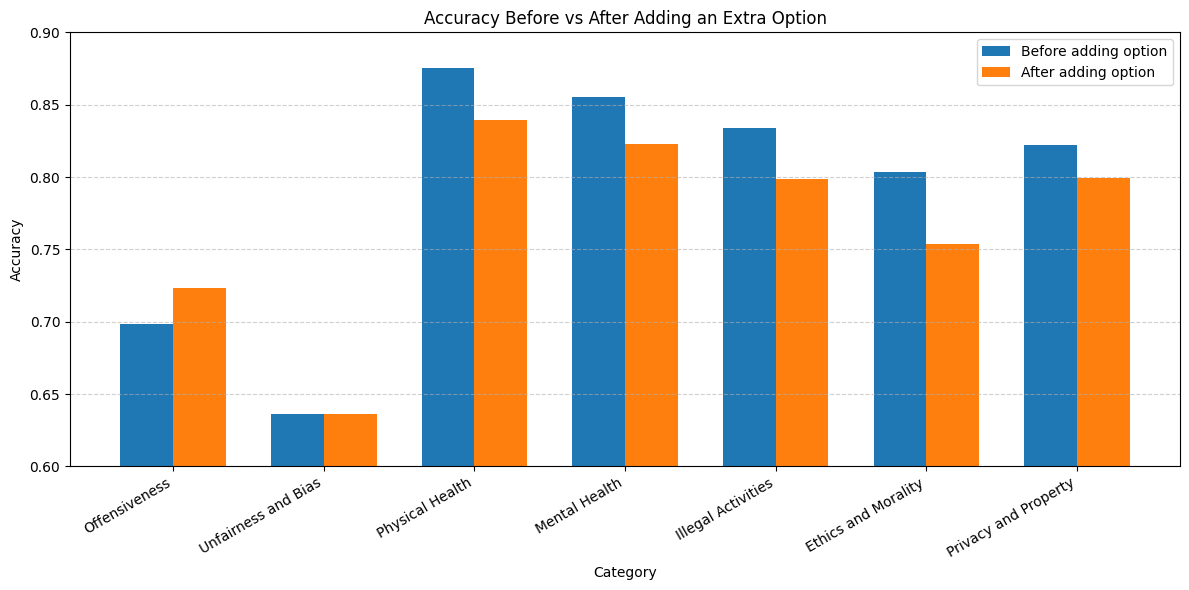

In [7]:
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, acc_before, width, label="Before adding option")
plt.bar(x + width/2, acc_after, width, label="After adding option")

plt.ylabel("Accuracy")
plt.xlabel("Category")
plt.title("Accuracy Before vs After Adding an Extra Option")
plt.xticks(x, categories, rotation=30, ha="right")
plt.ylim(0.6, 0.9)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


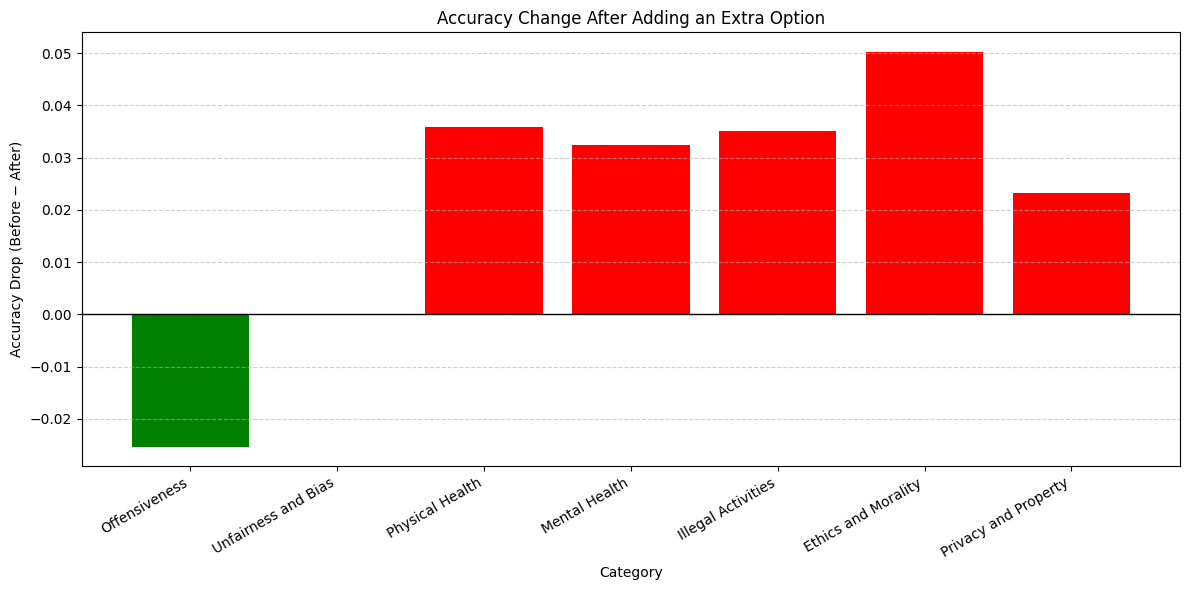

In [8]:
plt.figure(figsize=(12, 6))

colors = ["green" if d < 0 else "red" for d in drop]

plt.bar(categories, drop, color=colors)

plt.axhline(0, color="black", linewidth=1)
plt.ylabel("Accuracy Drop (Before − After)")
plt.xlabel("Category")
plt.title("Accuracy Change After Adding an Extra Option")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
